### Goal: Plot Arsenal's goal difference from data

In [1]:
import pandas as pd

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects

from PIL import Image
import requests
from io import BytesIO


from highlight_text import htext, fig_text, HighlightText, ax_text

In [2]:
df = pd.read_csv("C:/Users/Harry/Friends-Of-Tracking/data/Peter Mckeeven Lecture/pl_goal_summary_data.csv")
df.head()

,season_id,team,goals_for,goals_against,goal_diff,team_season
0,2010,Arsenal,72.0,43.0,29.0,Arsenal 2010/2011
1,2010,Aston Villa,48.0,59.0,-11.0,Aston Villa 2010/2011
2,2010,Birmingham,37.0,58.0,-21.0,Birmingham 2010/2011
3,2010,Blackburn,46.0,59.0,-13.0,Blackburn 2010/2011
4,2010,Blackpool,55.0,78.0,-23.0,Blackpool 2010/2011


In [3]:
# selectiing team
team = "Arsenal"

#### First Copy

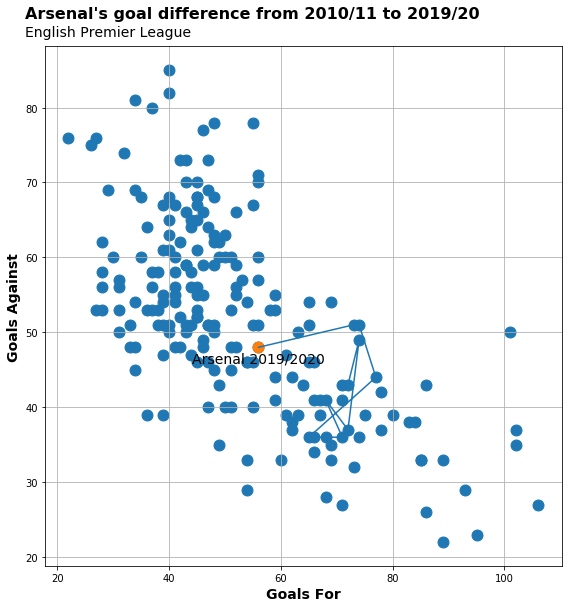

In [4]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor("w")

# adding a grid
ax.grid()

# getting our data to plot

x = df.goals_for.tolist()
y = df.goals_against.tolist()

ax.scatter(x,y,s=120)

# getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

# plotting a line to track team's change over seasons
ax.plot(x,y)

# plotting team's most recent season
ax.scatter(x[-1],y[-1],s=120)
t = ax.text(x[-1],y[-1]-2,t[-1],color='k',fontsize=14, ha="center")

# adding title and subtitle
fig.text(0.05,1,"{}'s goal difference from 2010/11 to 2019/20\n".format(team), fontsize=16, fontweight="bold")        
fig.text(0.05,1,"English Premier League",fontweight="regular", fontsize=14)

# adding x and y labels
ax.set_xlabel("Goals For", fontweight="bold", fontsize=14)
ax.set_ylabel("Goals Against", fontweight="bold", fontsize= 14)


plt.tight_layout()
plt.show()

#### Issues
1. Grid Lines are over points
2. Plot starting in jaggared manner
3. Team tag is not correctly visible
4. Need to highlight text 
5. Colors of plot are not clearly 

In [7]:
# Visual changes
background = "#343434"
text_color = "w"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

filler = "grey"
primary ="red"

title_font = "Kanit"
body_font = "Heebo"

C:\Users\Harry\anaconda3\lib\site-packages\ipykernel_launcher.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


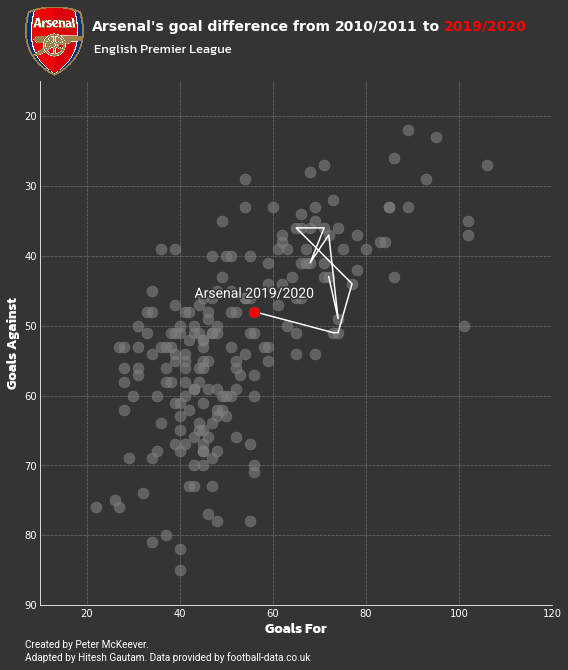

In [11]:
# creating figure and axes
fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# adding a grid with zorder and style
ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder= 1)

# getting our data to plot
x = df.goals_for.tolist()
y = df.goals_against.tolist()

# Adding alpha and lw to dots and color to match with background as it is not so important compared to key figure
ax.scatter(x,y,color= filler, s=120, alpha=0.6, lw=0.6, zorder= 2)

# getting data for specified team
x = df[df.team == team].goals_for.tolist()
y = df[df.team == team].goals_against.tolist()
t = df[df.team == team].team_season.tolist()

# plotting a line to track team's change over seasons
ax.plot(x,y, color = text_color, lw = 1.5, zorder= 3)

# plotting team's most recent season and label
ax.scatter(x[-1],y[-1],color = primary,s=120, edgecolor = background, alpha = 1, lw = .25, zorder= 4)
t = ax.text(x[-1],y[-1]-2,t[-1],color=text_color,fontsize=14, ha="center", fontfamily=body_font)

# Adding path effects
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])


# Changing title and subtitle
ssn_start = df[df.team == team].season_id.iloc[0]
ssn_end = df[df.team == team].season_id.iloc[-1]

ssn_start = str(ssn_start)+"/"+str(ssn_start+1)
ssn_end = str(ssn_end)+"/"+str(ssn_end+1)

s = "<{}>'s goal difference from <{}> to <{}>\n"

# x & y are according to the axes points
ax_text(x = 21, y = 7.5, s=s.format(team,ssn_start,ssn_end),
         fontweight='bold',
         fontsize=14,
         color = "w",
         va = "center",
         highlight_textprops=[{"color": 'white'},
                              {"color": 'white'},{"color": 'red'}],
        ax=ax)

# Issue in placing the following text wrt to axes
# fig_text(x=0.15, y=0.98,
#          s=s.format(team,ssn_start,ssn_end),
#          fontweight='bold',
#          fontsize=12,
#          color = "w",
#          va='center',
#          highlight_textprops=[{"color": 'red'},
#                               {"color": 'white'},{"color": 'red'} ])

fig.text(0.17,1.03,"English Premier League",fontweight="regular", fontsize=13,fontfamily=title_font, color=text_color)

# adding title and subtitle
# fig.text(0.05,1,"{}'s goal difference from 2010/11 to 2019/20\n".format(team), fontsize=16, fontweight="bold",
#          color=text_color, fontfamily=title_font)        
# fig.text(0.05,1,"English Premier League",fontweight="regular", fontsize=14, color=text_color)

# adding x and y labels
ax.set_xlabel("Goals For", fontfamily=title_font, fontweight="bold", fontsize=14, color=text_color)
ax.set_ylabel("Goals Against", fontfamily=title_font, fontweight="bold", fontsize= 14, color=text_color)

# Reverse Axis and set lims
ax.set_ylim(90,15)
ax.set_xlim(10,120)

# Spine and Pips
ax.tick_params(axis="both", length=0)

spines = ["top", "right", "bottom", "left"]
for spine in spines:
    if spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    else:
        ax.spines[spine].set_color(text_color)

# For badge: Adding new axes
ax2 = fig.add_axes([0.04,0.99,0.12,0.12])
ax2.axis("off")

url = "http://assets.stickpng.com/images/580b57fcd9996e24bc43c4df.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)        

# Adding Credits
fig.text(0.05, -0.025, "Created by Peter McKeever.\nAdapted by Hitesh Gautam. Data provided by football-data.co.uk",
        fontstyle="italic",fontsize=10, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.show()